In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("BRCA.csv")
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0  FEMALE  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0  FEMALE -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0  FEMALE  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0  FEMALE  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0  FEMALE  0.221550   1.90680   0.52045 -0.311990   

  Tumour_Stage                      Histology ER status PR status HER2 status  \
0          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
1           II             Mucinous Carcinoma  Positive  Positive    Negative   
2          III  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
3           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   
4           II  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   

                  Surgery_type Date_of_Surgery Date_of_Last_Visit  \
0  Mo

In [3]:
print(data.isnull().sum())

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64


In [4]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float64(5)

In [5]:
print(data.Gender.value_counts())

Gender
FEMALE    313
MALE        4
Name: count, dtype: int64


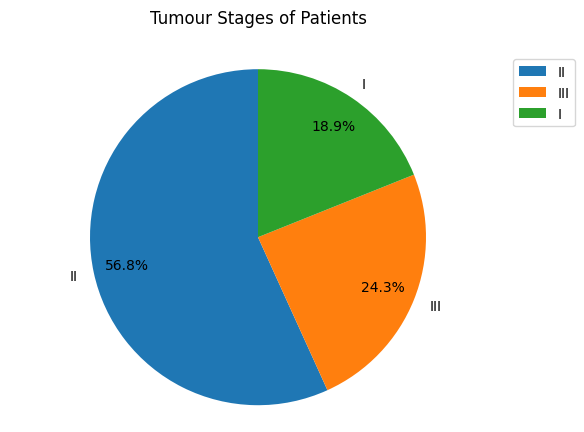

In [12]:

# Get the value counts of the tumor stages
stage = data["Tumour_Stage"].value_counts()
transactions = stage.index
quantity = stage.values

# Create a pie chart
plt.pie(quantity, labels=transactions, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, pctdistance=0.8)

# Set the title and adjust the layout
plt.title("Tumour Stages of Patients\n")
plt.axis('equal')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()

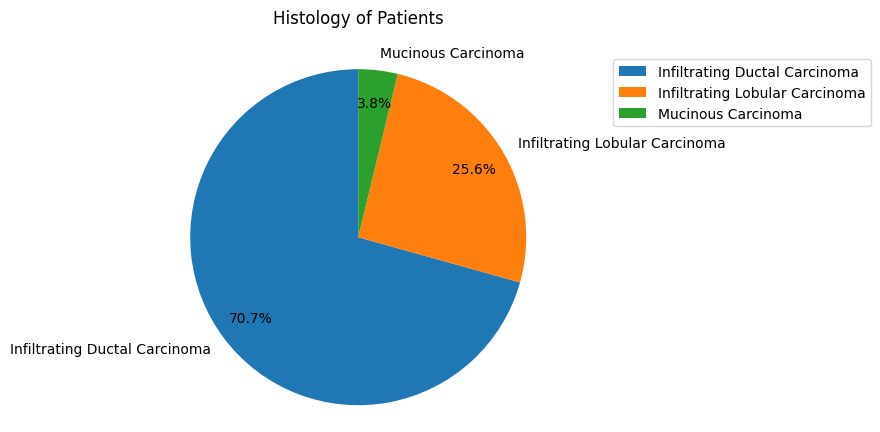

In [14]:


# Get the value counts of the histology types
histology = data["Histology"].value_counts()
transactions = histology.index
quantity = histology.values

# Create a pie chart
plt.pie(quantity, labels=transactions, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, pctdistance=0.8)

# Set the title and adjust the layout
plt.title("Histology of Patients\n")
plt.axis('equal')

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()

In [15]:
# ER status
print(data["ER status"].value_counts())
# PR status
print(data["PR status"].value_counts())
# HER2 status
print(data["HER2 status"].value_counts())

ER status
Positive    317
Name: count, dtype: int64
PR status
Positive    317
Name: count, dtype: int64
HER2 status
Negative    288
Positive     29
Name: count, dtype: int64


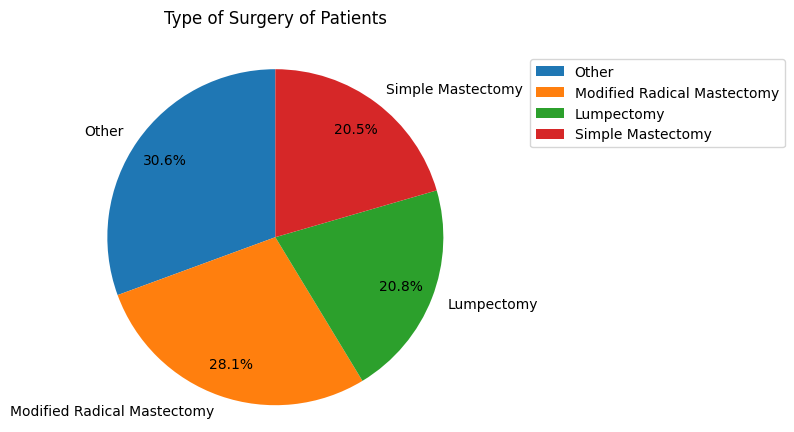

In [18]:


# Get the value counts of the surgery types
surgery = data["Surgery_type"].value_counts()
transactions = surgery.index
quantity = surgery.values

# Create a pie chart
plt.pie(quantity, labels=transactions, autopct=lambda p: '{:.1f}%'.format(p), startangle=90, pctdistance=0.8)

# Set the title and adjust the layout
plt.title("Type of Surgery of Patients\n")
plt.axis('equal')

# Add a legend
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(plt.plot([], [], label=transactions[0], marker='o', markersize=10, color='tab:orange')[0])
plt.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Show the plot
plt.show()

In [19]:
data["Tumour_Stage"] = data["Tumour_Stage"].map({"I": 1, "II": 2, "III": 3})
data["Histology"] = data["Histology"].map({"Infiltrating Ductal Carcinoma": 1, 
                                           "Infiltrating Lobular Carcinoma": 2, "Mucinous Carcinoma": 3})
data["ER status"] = data["ER status"].map({"Positive": 1})
data["PR status"] = data["PR status"].map({"Positive": 1})
data["HER2 status"] = data["HER2 status"].map({"Positive": 1, "Negative": 2})
data["Gender"] = data["Gender"].map({"MALE": 0, "FEMALE": 1})
data["Surgery_type"] = data["Surgery_type"].map({"Other": 1, "Modified Radical Mastectomy": 2, 
                                                 "Lumpectomy": 3, "Simple Mastectomy": 4})
print(data.head())

     Patient_ID   Age  Gender  Protein1  Protein2  Protein3  Protein4  \
0  TCGA-D8-A1XD  36.0       1  0.080353   0.42638   0.54715  0.273680   
1  TCGA-EW-A1OX  43.0       1 -0.420320   0.57807   0.61447 -0.031505   
2  TCGA-A8-A079  69.0       1  0.213980   1.31140  -0.32747 -0.234260   
3  TCGA-D8-A1XR  56.0       1  0.345090  -0.21147  -0.19304  0.124270   
4  TCGA-BH-A0BF  56.0       1  0.221550   1.90680   0.52045 -0.311990   

   Tumour_Stage  Histology  ER status  PR status  HER2 status  Surgery_type  \
0             3          1          1          1            2             2   
1             2          3          1          1            2             3   
2             3          1          1          1            2             1   
3             2          1          1          1            2             2   
4             2          1          1          1            2             1   

  Date_of_Surgery Date_of_Last_Visit Patient_Status  
0       15-Jan-17          19-Ju

In [21]:
# Splitting data

x = np.array(data[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4',  'Tumour_Stage', 'Histology', 'ER status', 'PR status',  'HER2 status', 'Surgery_type']])

y = np.array(data[['Patient_Status']])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

In [22]:
model = SVC()
model.fit(xtrain, ytrain)

c:\Users\Nafell Siya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC()

In [23]:
# Prediction
# features = [['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']]
features = np.array([[36.0, 1, 0.080353, 0.42638, 0.54715, 0.273680, 3, 1, 1, 1, 2, 2,]])
print(model.predict(features))

['Alive']
